### Importação de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

### Carregamento e Pré-Processamento dos Dados

In [4]:
# Carregar o dataset
data = pd.read_csv('parkinsons.csv')

# Separar variáveis independentes e dependentes
X = data.drop(['target'], axis=1)
y = data['target']

### Exercício 5

/Users/franciscoheleno/Documents/Coding/Python/IST/Apre/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/franciscoheleno/Documents/Coding/Python/IST/Apre/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/franciscoheleno/Documents/Coding/Python/IST/Apre/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/franciscoheleno/Documents/Coding/Python/IST/Apre/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

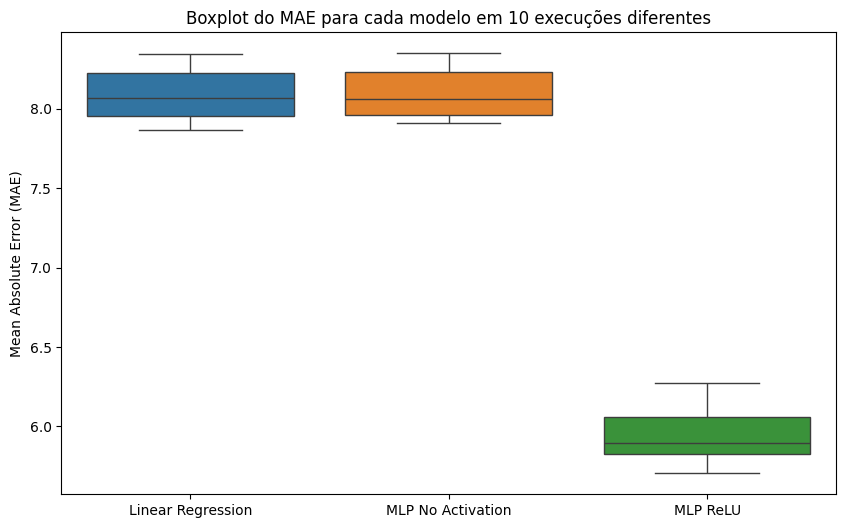

In [5]:
# Listas para armazenar os MAEs de cada modelo
mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

# Treinar e avaliar os modelos em 10 execuções diferentes
for i in range(1, 11):
    # Divisão 80-20 dos dados com random_state = i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Regressão Linear
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_linear))
    
    # MLP Regressor sem funções de ativação (identity)
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_mlp_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_mlp_no_activation))
    
    # MLP Regressor com ReLU
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_mlp_relu))

# Preparar os dados para o boxplot
results = pd.DataFrame({
    'Linear Regression': mae_linear,
    'MLP No Activation': mae_mlp_no_activation,
    'MLP ReLU': mae_mlp_relu
})

# Representar graficamente o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Boxplot do MAE para cada modelo em 10 execuções diferentes')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


### Exercício 6

A comparação entre a Regressão Linear e a MLP sem funções de ativação no boxplot mostra que o desempenho de ambas, medido pelo erro médio absoluto (MAE), é praticamente idêntico, rondando os 8.0. Esta semelhança deve-se ao facto de uma MLP sem funções de ativação se comportar como um modelo linear, isto porque sem a não-linearidade introduzida pelas funções de ativação, a MLP só consegue modelar relações lineares, o que a torna equivalente à Regressão Linear na sua capacidade de aprender a partir dos dados.

  Por outro lado, a MLP com a função de ativação ReLU apresenta um MAE significativamente mais baixo, entre 5.0 e 6.0, o que demonstra uma clara melhoria de desempenho. Isto sublinha a importância das funções de ativação nas MLPs, pois estas introduzem não-linearidade, permitindo assim ao modelo captar padrões complexos que os modelos lineares não conseguem. 

  Concluímos que as funções de ativação são essenciais para desbloquear o verdadeiro potencial das MLPs, visto que lhes permitem aprender além das relações lineares simples.


### Exercício 7

Seguindo a recomendação da professora de fazer o GridSearch "à mão" e fazendo o train-test-split no início:

Melhor combinação de hiperparâmetros: {'alpha': 0.001, 'learning_rate_init': 0.01, 'batch_size': 32.0}
Melhor MAE no conjunto de teste: 3.8731


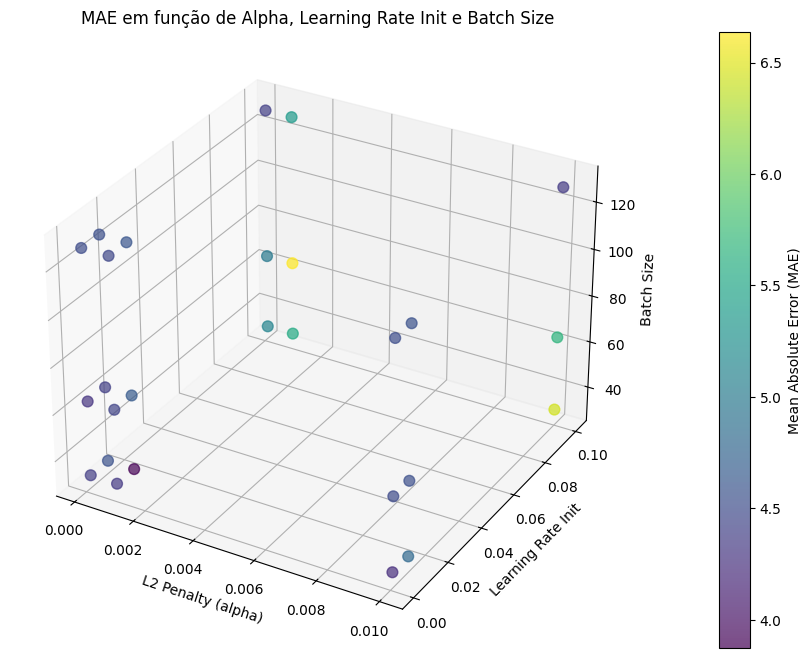

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from itertools import product

# Dividir o dataset em treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir a grade de parâmetros para a busca
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],                # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],       # Learning rate
    'batch_size': [32, 64, 128]                     # Batch size
}

# Criar lista de todas as combinações de hiperparâmetros
param_combinations = list(product(param_grid['alpha'], param_grid['learning_rate_init'], param_grid['batch_size']))

# Listas para armazenar os resultados
results = []

# Loop através de cada combinação de hiperparâmetros
for alpha, learning_rate, batch_size in param_combinations:
    # Definir o modelo com os hiperparâmetros atuais
    model = MLPRegressor(hidden_layer_sizes=(10, 10), 
                         alpha=alpha, 
                         learning_rate_init=learning_rate, 
                         batch_size=batch_size, 
                         random_state=0, 
                         max_iter=1000)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Calcular MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Armazenar os resultados
    results.append((alpha, learning_rate, batch_size, mae))

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results, columns=['alpha', 'learning_rate_init', 'batch_size', 'MAE'])

# Encontrar a melhor combinação de hiperparâmetros
best_row = results_df.loc[results_df['MAE'].idxmin()]
best_params = best_row[['alpha', 'learning_rate_init', 'batch_size']]
best_mae = best_row['MAE']

print(f"Melhor combinação de hiperparâmetros: {best_params.to_dict()}")
print(f"Melhor MAE no conjunto de teste: {best_mae:.4f}")

# Gráfico de Dispersão 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    results_df['alpha'],
    results_df['learning_rate_init'],
    results_df['batch_size'],
    c=results_df['MAE'],
    cmap='viridis',
    s=60,
    alpha=0.7
)

# Adicionar labels
ax.set_xlabel('L2 Penalty (alpha)')
ax.set_ylabel('Learning Rate Init')
ax.set_zlabel('Batch Size')
ax.set_title('MAE em função de Alpha, Learning Rate Init e Batch Size')

# Adicionar barra de cores
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Mean Absolute Error (MAE)')

plt.show()
